# Import libraries and data


In [2]:
%cd D://Flood Risk Churn-MF/Evaluacion del dataset 25001 para validacion de articulo/25033

D:\Flood Risk Churn-MF\Evaluacion del dataset 25001 para validacion de articulo\25033


C:\Users\ZM\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
%pip install xgboost

In [3]:
#import libraries
import xgboost as xgb
import itertools
import pandas as pd
import numpy as np

In [4]:
#import libraries
import pandas as pd
import tensorflow_probability as tfp
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
plt.style.use('seaborn-v0_8-talk')
plt.rcParams['lines.linewidth']=1.5
dark_style={
 'figure.facecolor':'#212946',
 'axes.facecolor':'#212946',
 'savefig.facecolor':'#212946',
 'axes.grid':True,
 'axes.grid.which':'both',
 'axes.spines.top':False,
 'axes.spines.bottom':False,
 'grid.color':'#2A3459',
 'grid.linewidth':'1',
 'text.color':'0.9',
 'axes.labelcolor':'0.9',
 'xtick.color':'0.9',
 'ytick.color':'0.9',
 'font.size':12
}
#plt.rcParams.update(dark_style)

In [3]:
import pandas as pd
import tensorflow_probability as tfp
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
plt.rcParams['lines.linewidth']=1.5

In [5]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import *
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.tbats import TBATS
from sktime.utils.plotting import plot_series

#Data Transformation

In [9]:
def metricas(y_true,y_pred,model_name):
    mae_=mean_absolute_error(y_true,y_pred)
    rmse_=mean_squared_error(y_true,y_pred,square_root=True)
    mape_=mean_absolute_percentage_error(y_true,y_pred)
    smape_=mean_absolute_percentage_error(y_true,y_pred,symmetric=True)
    dict_={'MAE':mae_,'RMSE_':rmse_,'MAPE':mape_,'SMAPE':smape_}
    metrica1=pd.DataFrame(dict_,index=[model_name])
    return(metrica1.round(decimals=2))

In [9]:
%pip install pymannkendall

Note: you may need to restart the kernel to use updated packages.


In [6]:
import statsmodels.api as sm
import pymannkendall as mk
data = pd.read_csv("25033_mens.csv",
                   index_col="FECHA",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]


#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982])]
#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977])]
data = dataset[dataset.Year.isin( [1972,1973,1974])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
y_train,y_test=temporal_train_test_split(data['PRECIP'],test_size=4)
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_acf(y_train, lags=10, ax=ax)
plt.show()
print (mk.hamed_rao_modification_test(y_train))
print(mk.yue_wang_modification_test(y_train))
print(mk.trend_free_pre_whitening_modification_test(y_train))
print(mk.pre_whitening_modification_test(y_train))
print(mk.original_test(y_train, alpha=0.05))

NameError: name 'temporal_train_test_split' is not defined

In [ ]:
data = pd.read_csv("25033_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)



#data = dataset[dataset.Year.isin( [1992,1993,1994,1995,1996,1997,1998,1999])]
#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 

y_train,y_test=temporal_train_test_split(data['PRECIP'],test_size=1)
#y_train.plot(figsize=(12,8));
#plt.show()
#fig, ax = plt.subplots(figsize=(12, 8))
#sm.graphics.tsa.plot_acf(y_train, lags=20, ax=ax)
#plt.show()
print (mk.hamed_rao_modification_test(y_train))
print(mk.yue_wang_modification_test(y_train))
print(mk.trend_free_pre_whitening_modification_test(y_train))
print(mk.pre_whitening_modification_test(y_train))
print(mk.original_test(y_train, alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.8119279028944404, z=-0.23793964914681148, Tau=-0.020361990950226245, s=-27.0, var_s=11940.240164239784, slope=-0.3793939393939406, intercept=841.2745454545455)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='no trend', h=False, p=0.7062127066768593, z=-0.3769473843552854, Tau=-0.020361990950226245, s=-27.0, var_s=4757.5704472481075, slope=-0.3793939393939406, intercept=841.2745454545455)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='no trend', h=False, p=0.9223559101771723, z=0.09746653335219396, Tau=0.01019607843137255, s=13.0, var_s=15158.333333333334, slope=-0.3793939393939406, intercept=841.2745454545455)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='no trend', h=False, p=0.9223559101771723, z=0.09746653335219396, Tau=0.01019607843137255, s=13.0, var_s=15158.333333333334, slope=-0.3793939393939406, intercept=841.2745454545455)
Mann_Kendall_Test(trend='no trend', h=False, 

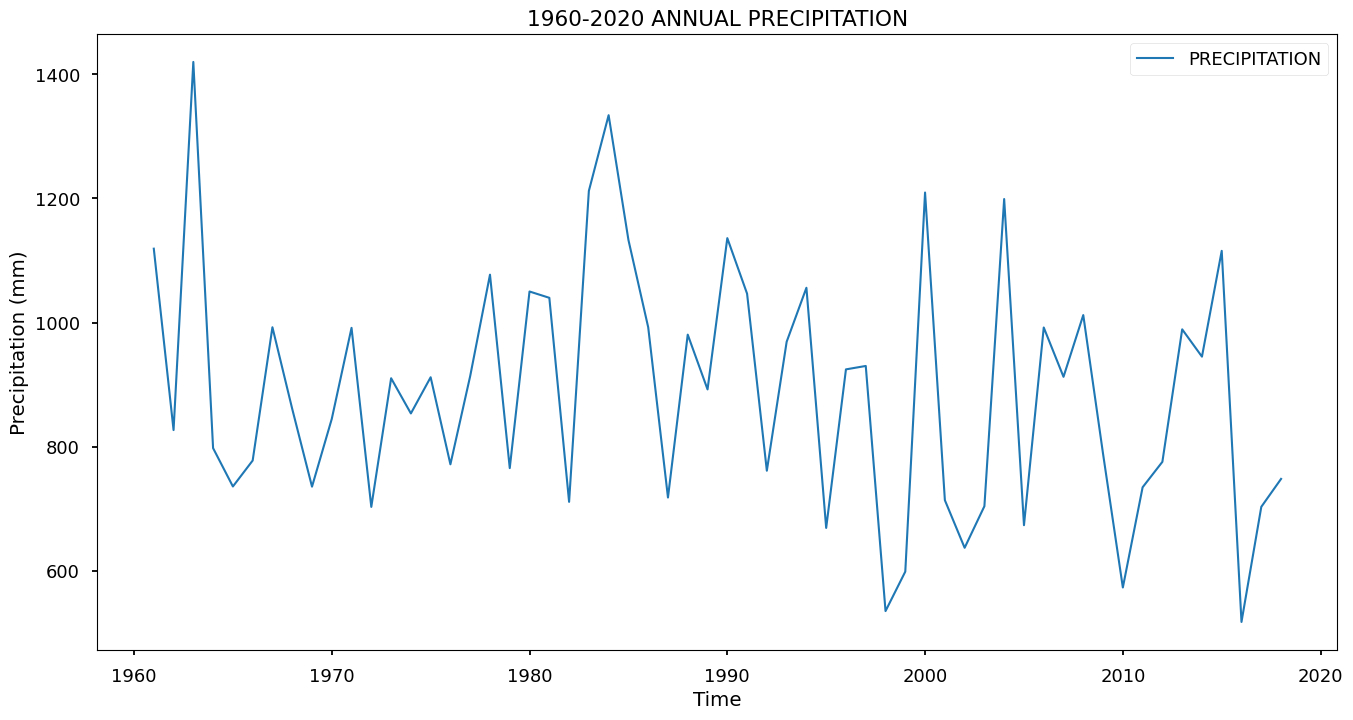

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = pd.read_csv("25033_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 

plt.figure(figsize=(16, 8))
plt.plot(data.index, data['PRECIP'], label='PRECIPITATION')

plt.title('1960-2020 ANNUAL PRECIPITATION')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

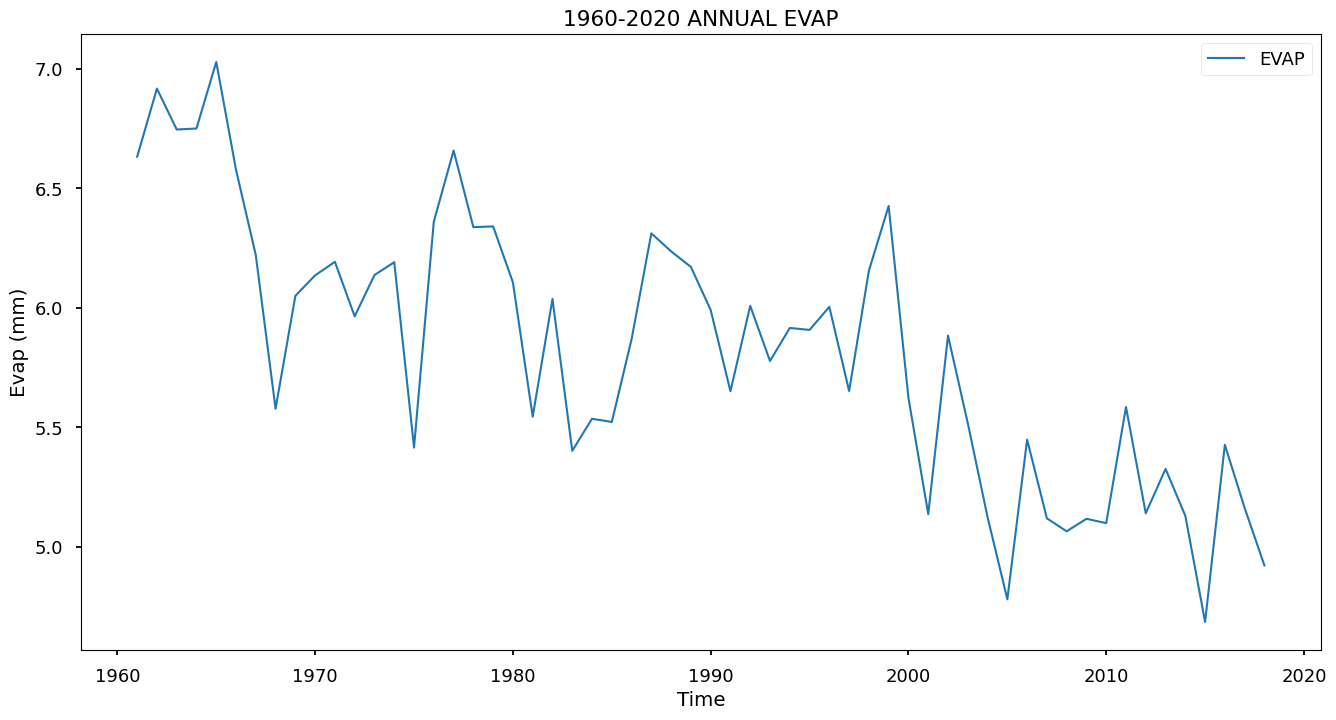

In [39]:
data = pd.read_csv("25033_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 

plt.figure(figsize=(16, 8))
plt.plot(data.index, data['EVAP'], label='EVAP')

plt.title('1960-2020 ANNUAL EVAP')
plt.xlabel('Time')
plt.ylabel('Evap (mm)')
plt.legend()
plt.show()

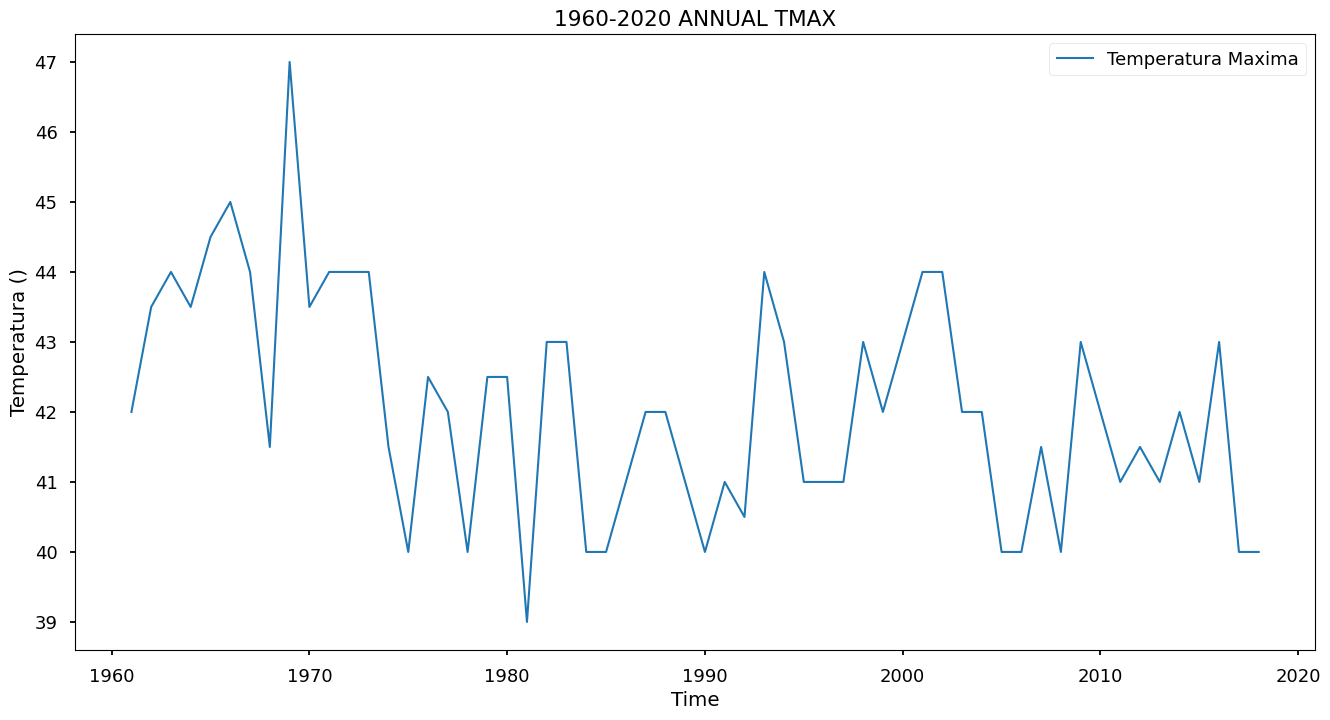

In [40]:
data = pd.read_csv("25033_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 

plt.figure(figsize=(16, 8))
plt.plot(data.index, data['TMAX'], label='Temperatura Maxima')

plt.title('1960-2020 ANNUAL TMAX')
plt.xlabel('Time')
plt.ylabel('Temperatura ()')
plt.legend()
plt.show()

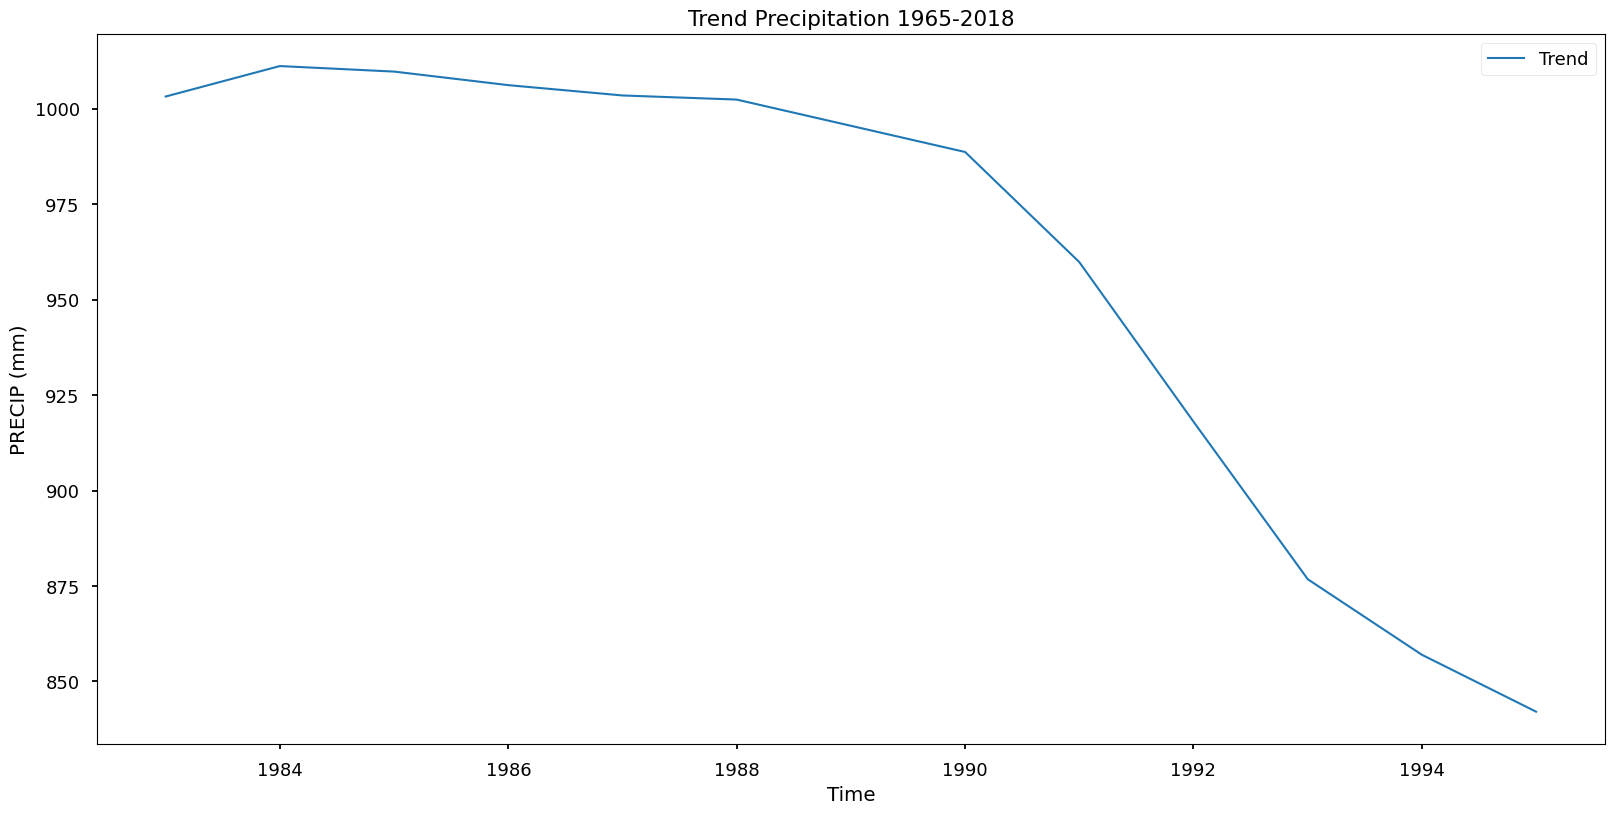

In [5]:
data = pd.read_csv("25033_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)
from statsmodels.tsa.seasonal import seasonal_decompose


data = data[data.Year.isin( [1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1988,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000.2001,2002,2003])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
result = seasonal_decompose(data['PRECIP'], model='additive', period=12)
plt.figure(figsize=(16, 8))

plt.plot(data.index,result.trend, label='Trend')
plt.legend()
plt.title('Trend Precipitation 1965-2018')
plt.tight_layout()
plt.xlabel('Time')
plt.ylabel('PRECIP (mm)')
plt.show()

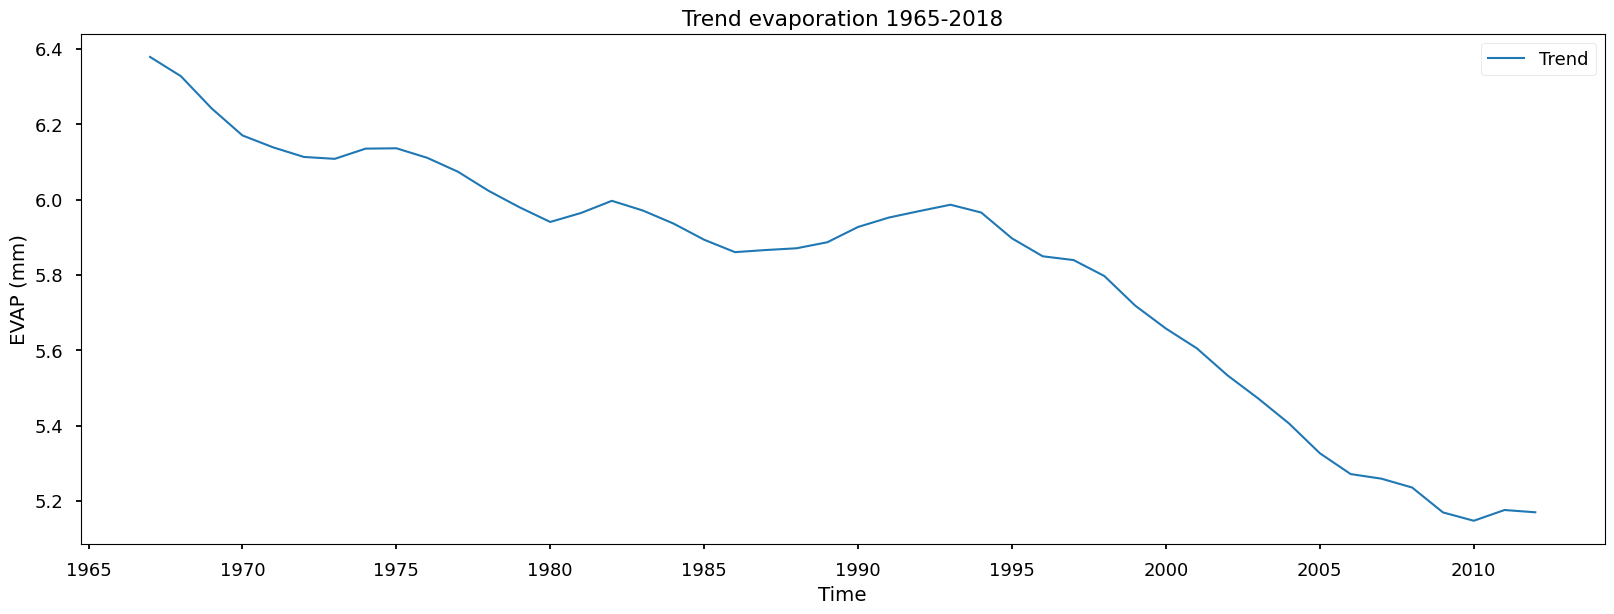

In [44]:
result = seasonal_decompose(data['EVAP'], model='additive', period=12)
plt.figure(figsize=(16, 6))
plt.plot(data.index,result.trend, label='Trend')
plt.legend()
plt.title('Trend evaporation 1965-2018')
plt.tight_layout()
plt.xlabel('Time')
plt.ylabel('EVAP (mm)')
plt.show()

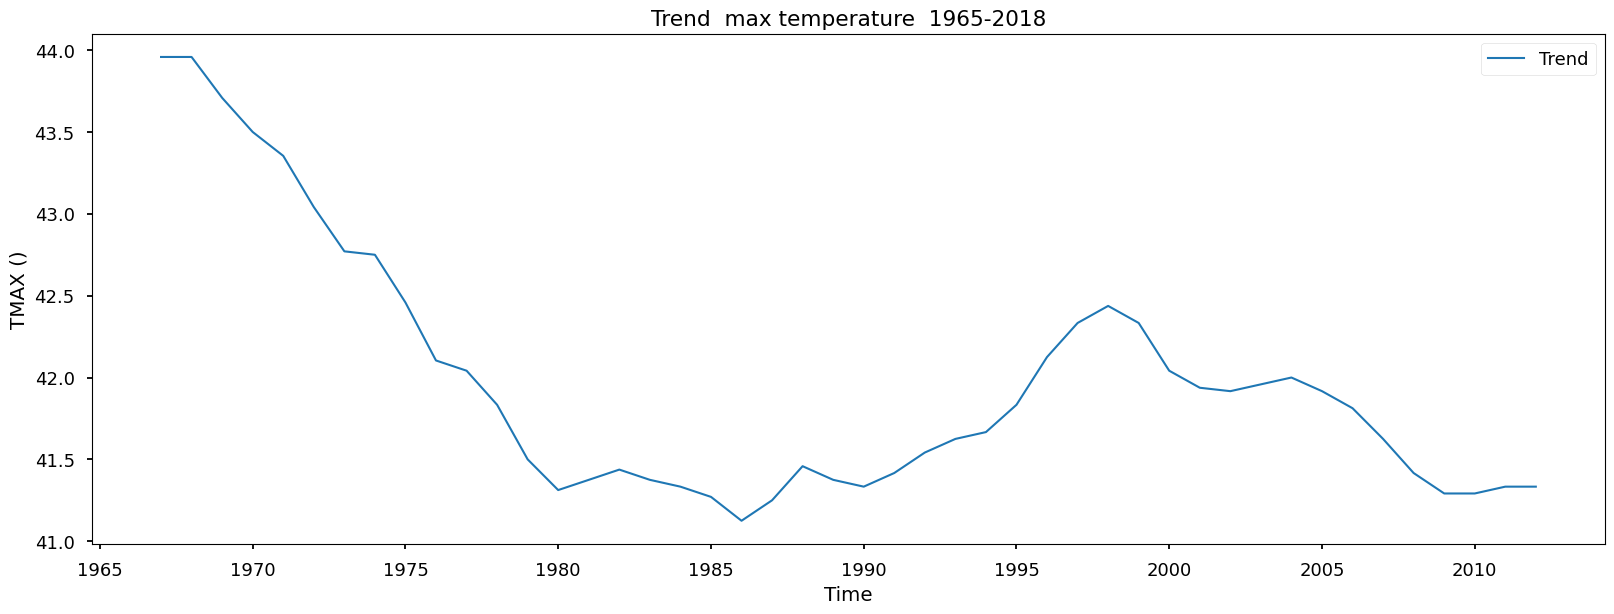

In [45]:
result = seasonal_decompose(data['TMAX'], model='additive', period=12)
plt.figure(figsize=(16, 6))
plt.plot(result.trend, label='Trend')
plt.legend()
plt.title('Trend  max temperature  1965-2018')
plt.tight_layout()
plt.xlabel('Time')
plt.ylabel('TMAX ()')
plt.show()

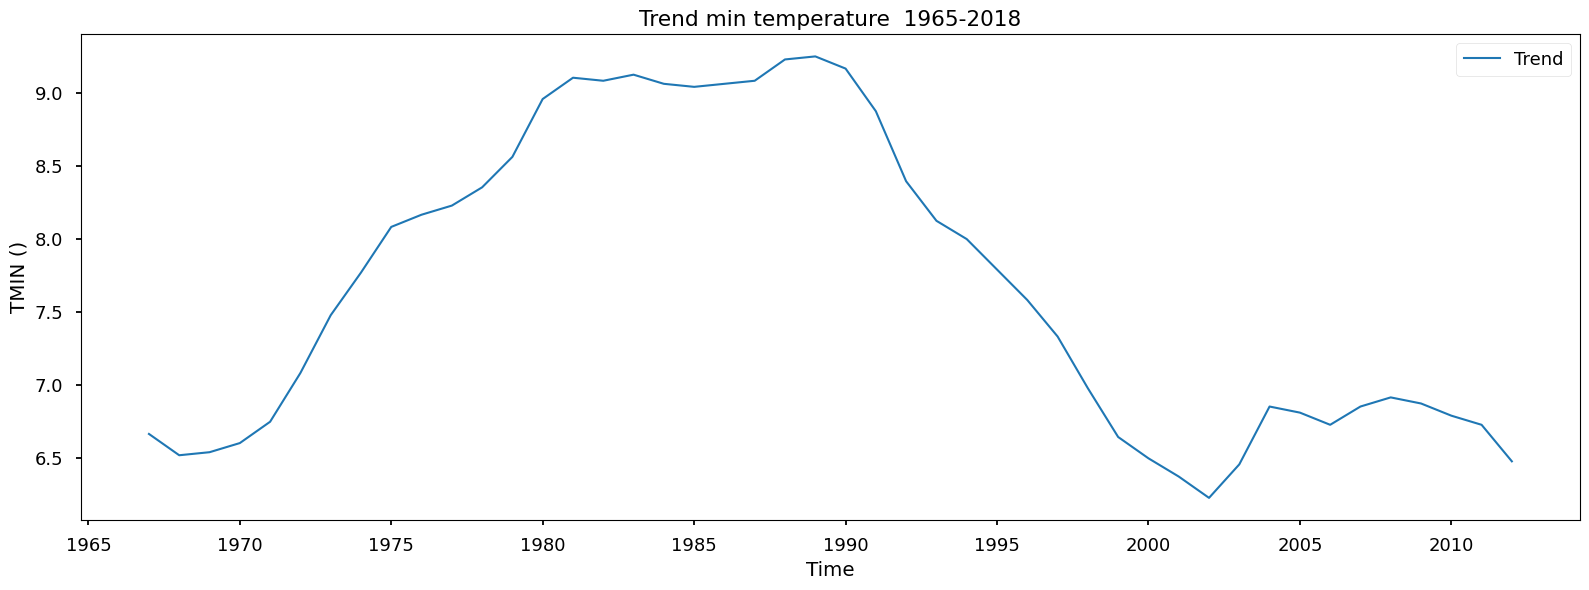

In [47]:
result = seasonal_decompose(data['TMIN'], model='additive', period=12)
plt.figure(figsize=(16, 6))
#plt.plot(data.index,result.seasonal, label='Seasonal')
plt.plot(result.trend, label='Trend')
plt.legend()
plt.xlabel('Time')
plt.ylabel('TMIN ()')
plt.title('Trend min temperature  1965-2018')
plt.tight_layout()
plt.show()

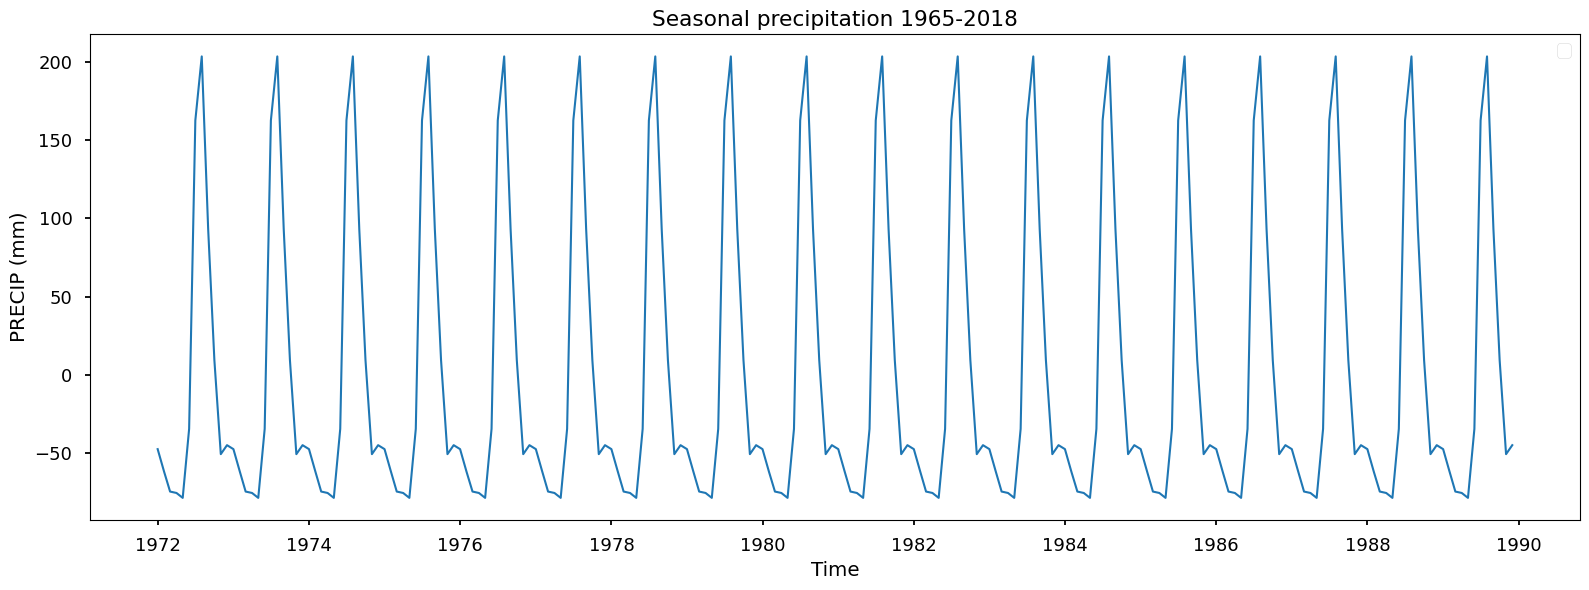

In [53]:
result = seasonal_decompose(data['PRECIP'], model='additive', period=12)
plt.figure(figsize=(16, 6))
plt.plot(data.index,result.seasonal)
plt.plot(label='Trend')
plt.legend()
plt.xlabel('Time')
plt.ylabel('PRECIP (mm)')
plt.title('Seasonal precipitation 1965-2018')
plt.tight_layout()
plt.show()

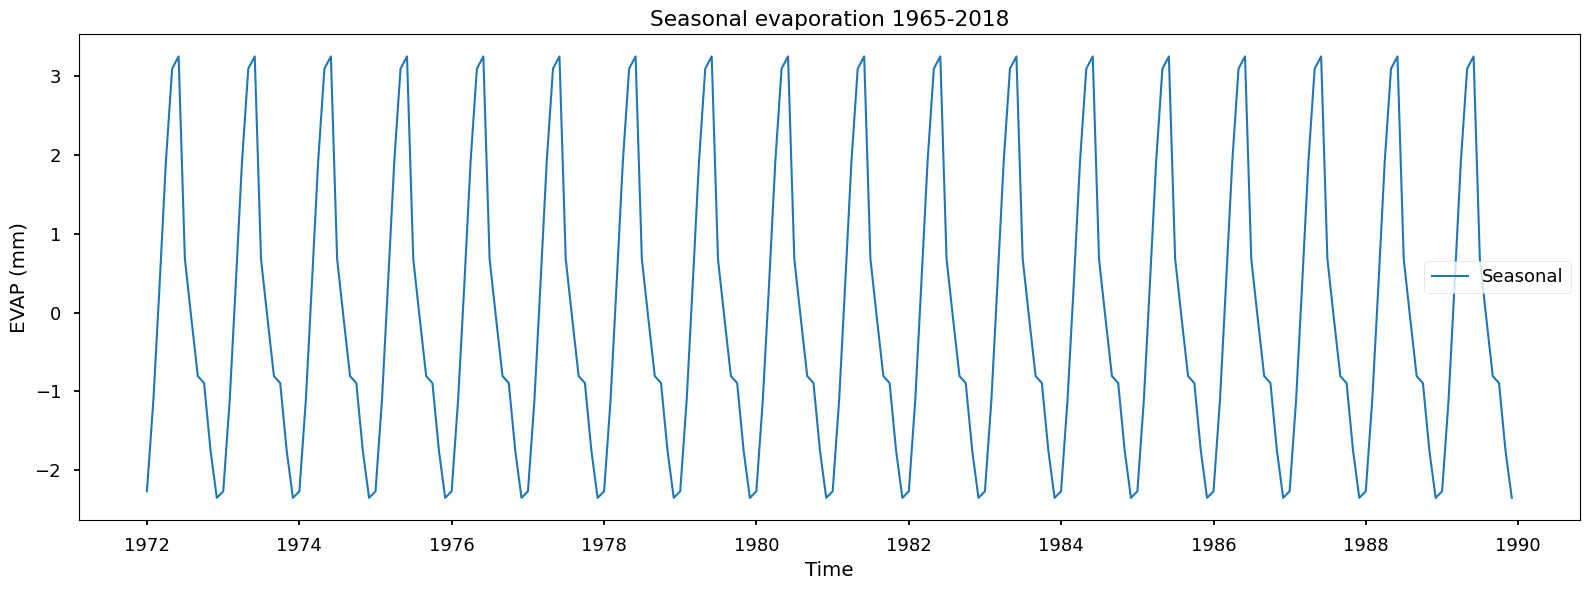

In [55]:
result = seasonal_decompose(data['EVAP'], model='additive', period=12)
plt.figure(figsize=(16, 6))
#plt.plot(data.index,result.seasonal, label='Seasonal')
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('EVAP (mm)')
plt.title('Seasonal evaporation 1965-2018')
plt.tight_layout()
plt.show()

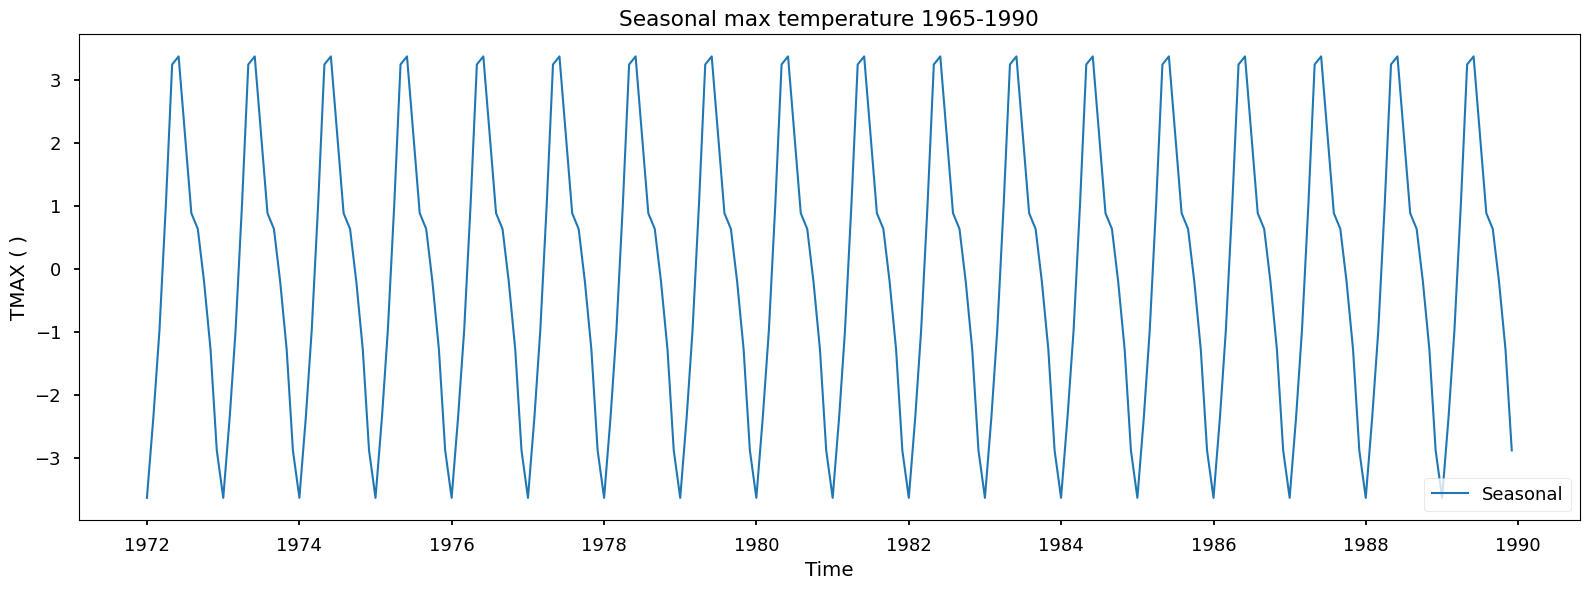

In [59]:
#get the data
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
data = pd.read_csv("25033_mens.csv",
                   index_col="FECHA",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]

data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
result = seasonal_decompose(data['TMAX'], model='additive', period=12)
#plt.subplot(4, 1, 1)
plt.figure(figsize=(16, 6))
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('TMAX ( )')
plt.title('Seasonal max temperature 1965-1990')
plt.tight_layout()
plt.show()

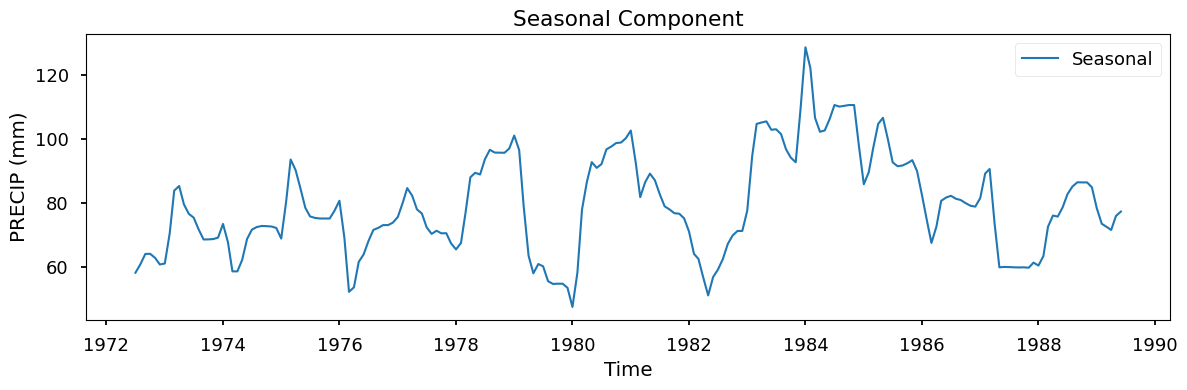

In [35]:
#get the data
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
data = pd.read_csv("25033_mens.csv",
                   index_col="FECHA",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]

data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989])]
#data = dataset[dataset.Year.isin( [1972,1973,1974])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
result = seasonal_decompose(data['PRECIP'], model='additive', period=12)
#plt.subplot(4, 1, 3)
plt.figure(figsize=(12, 4))
plt.plot(data.index,result.trend, label='Seasonal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('PRECIP (mm)')
plt.title('Seasonal Component')
plt.tight_layout()
plt.show()

#XGBoost

In [ ]:
import statsmodels.api as sm
import pymannkendall as mk
data = pd.read_csv("25033_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['PRECIP']))
print(mk.yue_wang_modification_test(data['PRECIP']))
print(mk.trend_free_pre_whitening_modification_test(data['PRECIP']))
print(mk.pre_whitening_modification_test(data['PRECIP']))
print(mk.original_test(data['PRECIP'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.5496181473973174, z=-0.5983324216827873, Tau=-0.057329462989840346, s=-79.0, var_s=16994.333333333332, slope=-1.1774436090225566, intercept=856.2135338345865)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='no trend', h=False, p=0.3643367593371316, z=-0.9071324509438675, Tau=-0.057329462989840346, s=-79.0, var_s=7393.4612123189645, slope=-1.1774436090225566, intercept=856.2135338345865)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='no trend', h=False, p=0.8189923330677218, z=-0.22884121325543835, Tau=-0.02262443438914027, s=-30.0, var_s=16059.333333333334, slope=-1.1774436090225566, intercept=856.2135338345865)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='no trend', h=False, p=0.770309696305763, z=-0.2919698238086627, Tau=-0.02865761689291101, s=-38.0, var_s=16059.333333333334, slope=-1.1774436090225566, intercept=856.2135338345865)
Mann_Kendall_Test(trend='no trend', h=Fals

In [43]:
import statsmodels.api as sm
import pymannkendall as mk
data = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['EVAP']))
print(mk.yue_wang_modification_test(data['EVAP']))
print(mk.trend_free_pre_whitening_modification_test(data['EVAP']))
print(mk.pre_whitening_modification_test(data['EVAP']))
print(mk.original_test(data['EVAP'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='decreasing', h=True, p=3.6598789246999885e-05, z=-4.127964944136751, Tau=-0.4876632801161103, s=-672.0, var_s=26422.44723969252, slope=-0.03161525396944214, intercept=6.805056712495114)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='decreasing', h=True, p=1.1093792551264414e-11, z=-6.7915469444899905, Tau=-0.4876632801161103, s=-672.0, var_s=9761.299235575338, slope=-0.03161525396944214, intercept=6.805056712495114)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='decreasing', h=True, p=1.2743724076003105e-08, z=-5.689466026109347, Tau=-0.5444947209653092, s=-722.0, var_s=16059.333333333334, slope=-0.03161525396944214, intercept=6.805056712495114)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='decreasing', h=True, p=0.005343700777913352, z=-2.7855499406610256, Tau=-0.2669683257918552, s=-354.0, var_s=16059.333333333334, slope=-0.03161525396944214, intercept=6.805056712495114)
Mann_Kendall_Test(trend='d

In [44]:
import statsmodels.api as sm
import pymannkendall as mk
data = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['TMAX']))
print(mk.yue_wang_modification_test(data['TMAX']))
print(mk.trend_free_pre_whitening_modification_test(data['TMAX']))
print(mk.pre_whitening_modification_test(data['TMAX']))
print(mk.original_test(data['TMAX'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=0.026889900304810865, z=2.2131123582081615, Tau=0.20827285921625543, s=287.0, var_s=16700.333333333332, slope=0.03297101449275362, intercept=44.142753623188405)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='increasing', h=True, p=0.0004130265552078072, z=3.5316173487921185, Tau=0.20827285921625543, s=287.0, var_s=6558.201906076488, slope=0.03297101449275362, intercept=44.142753623188405)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='increasing', h=True, p=0.010808880065958482, z=2.548817651086434, Tau=0.24434389140271492, s=324.0, var_s=16059.333333333334, slope=0.03297101449275362, intercept=44.142753623188405)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='increasing', h=True, p=0.04088639656791737, z=2.0446802035489013, Tau=0.19607843137254902, s=260.0, var_s=16045.333333333334, slope=0.03297101449275362, intercept=44.142753623188405)
Mann_Kendall_Test(trend='increasing', 

In [45]:
import statsmodels.api as sm
import pymannkendall as mk
data = pd.read_csv("25044_anual.csv",
                   index_col="FECHA",
                   parse_dates=True)

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
print (mk.hamed_rao_modification_test(data['TMIN']))
print(mk.yue_wang_modification_test(data['TMIN']))
print(mk.trend_free_pre_whitening_modification_test(data['TMIN']))
print(mk.pre_whitening_modification_test(data['TMIN']))
print(mk.original_test(data['TMIN'], alpha=0.05))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.1275918671958407, z=-1.5236671991785735, Tau=-0.1313497822931785, s=-181.0, var_s=13956.122521985037, slope=-0.030012004801920768, intercept=3.78031212484994)
Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='decreasing', h=True, p=0.017641646159945124, z=-2.3730548027699485, Tau=-0.1313497822931785, s=-181.0, var_s=5753.464987448804, slope=-0.030012004801920768, intercept=3.78031212484994)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='no trend', h=False, p=0.2796626607479866, z=-1.0810774557239673, Tau=-0.10407239819004525, s=-138.0, var_s=16059.333333333334, slope=-0.030012004801920768, intercept=3.78031212484994)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='no trend', h=False, p=0.3199832127092366, z=-0.9944923812957764, Tau=-0.09577677224736049, s=-127.0, var_s=16052.333333333334, slope=-0.030012004801920768, intercept=3.78031212484994)
Mann_Kendall_Test(trend='no trend', 